크롤링 한 이미지 중 외부 이미지 거르기

In [1]:
pip install transformers torch

In [2]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

In [3]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base").to("cuda")

KeyboardInterrupt: 

In [ ]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

question = "how many dogs are in the picture?"
inputs = processor(raw_image, question, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


1


In [ ]:
from PIL import Image
import torch
import matplotlib.pyplot as plt
from transformers import AutoProcessor, AutoModelForSeq2SeqLM

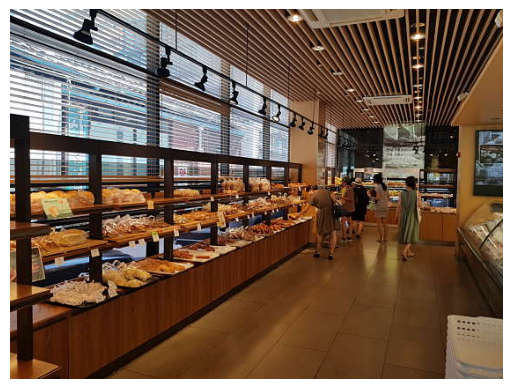

no


In [ ]:
img_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/11627707_1.jpg'
raw_image = Image.open(img_path).convert('RGB')

plt.imshow(raw_image)
plt.axis('off')  # 축 제거
plt.show()

question = "Is this an outdoor scene?"
inputs = processor(raw_image, question, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

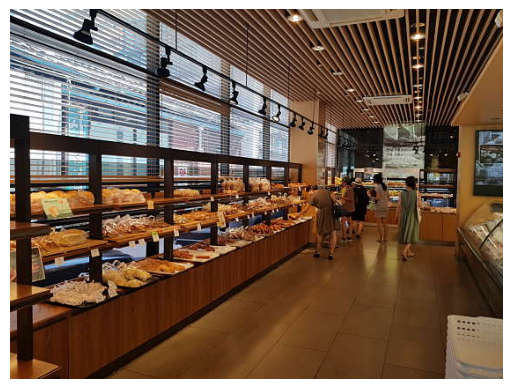

no


In [ ]:
img_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/11627707_1.jpg'
raw_image = Image.open(img_path).convert('RGB')

plt.imshow(raw_image)
plt.axis('off')  # 축 제거
plt.show()

question = "Is this an outdoor scene including such as store sign?"
inputs = processor(raw_image, question, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

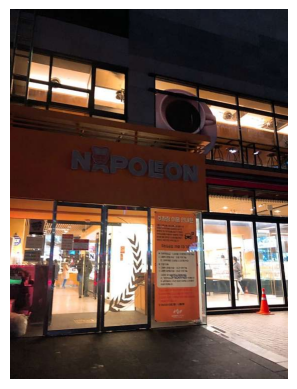

yes


In [ ]:
img_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/11627707_2.jpg'
raw_image = Image.open(img_path).convert('RGB')

plt.imshow(raw_image)
plt.axis('off')  # 축 제거
plt.show()

question = "Is this an outdoor scene including such as store sign?"
inputs = processor(raw_image, question, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

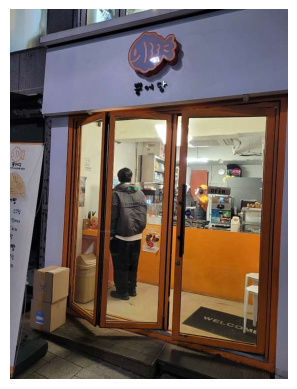

yes


In [ ]:
img_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/1476884811_3.jpg'
raw_image = Image.open(img_path).convert('RGB')

plt.imshow(raw_image)
plt.axis('off')  # 축 제거
plt.show()

question = "Is this an outdoor scene including such as store sign?"
inputs = processor(raw_image, question, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

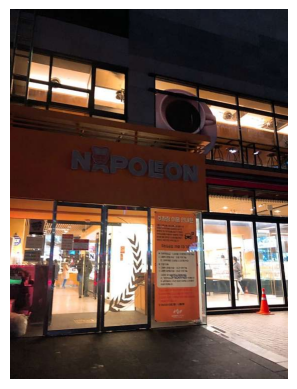

yes


In [ ]:
img_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/filtered_images/seongbuk/image/11627707/11627707_2.jpg'
raw_image = Image.open(img_path).convert('RGB')

plt.imshow(raw_image)
plt.axis('off')  # 축 제거
plt.show()

question = "Is this an exterior photo that possibly includes buildings, streets, a store sign, or a door? (Yes or No)"
inputs = processor(raw_image, question, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

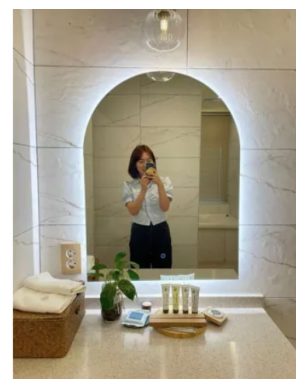

no


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
img_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/sample/no.png'
raw_image = Image.open(img_path).convert('RGB')

plt.imshow(raw_image)
plt.axis('off')  # 축 제거
plt.show()

question = "Is this an outdoor scene including such as a store sign? (Yes or No)"


out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

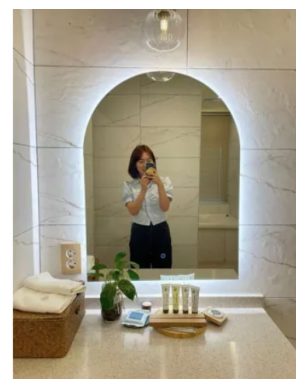

no


In [ ]:
img_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/sample/no.png'
raw_image = Image.open(img_path).convert('RGB')

plt.imshow(raw_image)
plt.axis('off')  # 축 제거
plt.show()

question = """
Does this photo show the interior of a cafe, highlighting elements such as furniture, decor, lighting, or the general ambiance?
(Yes or No)
"""

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

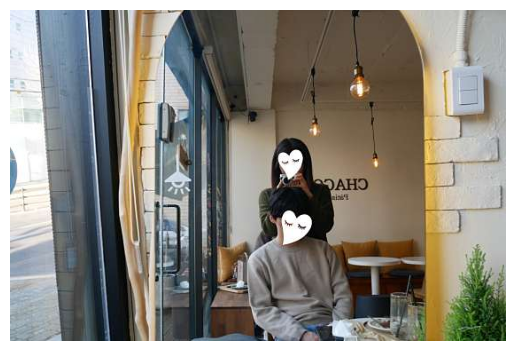

no


In [ ]:
img_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/sample/1091896358_1.jpg'
raw_image = Image.open(img_path).convert('RGB')

plt.imshow(raw_image)
plt.axis('off')  # 축 제거
plt.show()

question = """
Does this photo show the interior of a cafe, highlighting elements such as furniture, decor, lighting, or the general ambiance?
(Yes or No)
"""

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

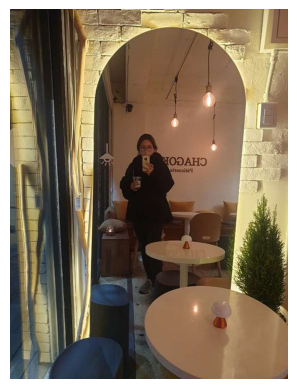

no


In [ ]:
img_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/sample/1091896358_4.jpg'
raw_image = Image.open(img_path).convert('RGB')

plt.imshow(raw_image)
plt.axis('off')  # 축 제거
plt.show()

question = """
Does this photo show the interior of a cafe, highlighting elements such as furniture, decor, lighting, or the general ambiance?
(Yes or No)
"""

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

1.	Was this photo taken outdoors?
2.	Is this an outdoor scene?
3.	Does this image show an outdoor environment?
4.	Is the setting of this image outdoors?

# Start

In [ ]:
!pip install tqdm

In [5]:
import zipfile
import os
from PIL import Image
import torch
import shutil
from transformers import AutoProcessor, AutoModelForSeq2SeqLM
from tqdm import tqdm  # 진행률 바 추가

In [4]:
import shutil
import os

output_dir = '/content/drive/MyDrive/KU/AIKU/24-2 project/filtered_images/seongbuk'  # 내부 사진만 저장할 폴더

# output_dir의 모든 파일 삭제
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)  # 폴더와 그 안의 모든 파일 및 폴더 삭제

# output_dir 폴더 다시 생성
os.makedirs(output_dir, exist_ok=True)

print(f"All files in '{output_dir}' have been deleted.")

All files in '/content/drive/MyDrive/KU/AIKU/24-2 project/filtered_images/seongbuk' have been deleted.


## Final code

In [ ]:
# 압축 파일 경로 및 이미지 저장할 폴더 설정
zip_file_path = '/content/drive/MyDrive/KU/AIKU/24-2 project/original/seongbuk.zip'
output_dir = '/content/drive/MyDrive/KU/AIKU/24-2 project/filtered_images/seongbuk'  # 내부 사진만 저장할 폴더

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/unzipped_images')

# 모델과 프로세서 초기화
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base").to("cuda")

# 질문 설정
question1 = "Is this an outdoor scene including such as a store sign? (Yes or No)"
question2 = """
Does this photo show the interior of a cafe, highlighting elements such as furniture, decor, lighting, or the general ambiance?
(Yes or No)
"""

# 내부 사진 저장 폴더가 없으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 압축 해제된 폴더 탐색
for root, dirs, files in os.walk('/content/unzipped_images'):
    for file in files:
        if file.endswith(('.jpg', '.png')) and not file.startswith("._"):  # 시스템 파일 무시
            image_path = os.path.join(root, file)

            try:
                # 이미지 열기
                raw_image = Image.open(image_path).convert('RGB')

                # 첫 번째 질문에 대한 응답
                inputs1 = processor(raw_image, question1, return_tensors="pt").to("cuda")
                out1 = model.generate(**inputs1)
                answer1 = processor.decode(out1[0], skip_special_tokens=True)

                # 두 번째 질문에 대한 응답
                inputs2 = processor(raw_image, question2, return_tensors="pt").to("cuda")
                out2 = model.generate(**inputs2)
                answer2 = processor.decode(out2[0], skip_special_tokens=True)

                # 조건에 맞는 경우에만 저장 (첫 번째 질문에서 "no", 두 번째 질문에서 "yes")
                if "no" in answer1.lower() and "yes" in answer2.lower():
                    # 폴더 구조 유지하면서 저장
                    relative_path = os.path.relpath(root, '/content/unzipped_images')
                    save_dir = os.path.join(output_dir, relative_path)
                    os.makedirs(save_dir, exist_ok=True)

                    # 이미지 복사
                    shutil.copy(image_path, os.path.join(save_dir, file))
                    print(f"Saved cafe interior image: {file}")

            except UnidentifiedImageError:
                print(f"Skipped file (not a valid image): {file}")
            except Exception as e:
                print(f"Error processing file {file}: {e}")

print("Filtering complete. Selected cafe interior images saved in:", output_dir)

Saved cafe interior image: 1942081054_5.jpg
Saved cafe interior image: 1942081054_1.jpg
Saved cafe interior image: 38233066_2.jpg
Saved cafe interior image: 38233066_4.jpg
Saved cafe interior image: 38233066_5.jpg
Saved cafe interior image: 38233066_3.jpg
Saved cafe interior image: 1584365222_5.jpg
Saved cafe interior image: 1584365222_2.jpg
Saved cafe interior image: 1584365222_1.jpg
Saved cafe interior image: 1584365222_4.jpg
